# <center>King County USA - House Price Prediction</center>
<center>Dataset source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction</center>

### Import libraries and functions

In [1]:
# Standard libraries
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette=None)

# Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Read and format the dataset

In [2]:
data = pd.read_csv('kc_house_data.csv')
print('#Rows:',data.shape[0],' #Columns:',data.shape[1])
data.head(3)

#Rows: 21613  #Columns: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
data["year"] = pd.DatetimeIndex(data["date"]).year

In [5]:
data["renovated"] = 1-(data["yr_renovated"]==0).astype(int)

In [6]:
data.drop(['id','date','yr_renovated'], axis=1, inplace=True)

In [7]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,2014,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,2014,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2015,0


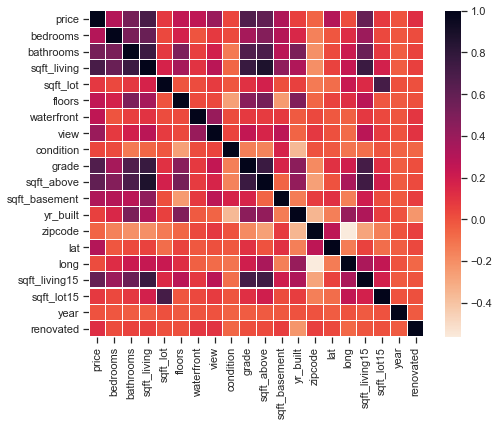

In [8]:
plt.figure(figsize=(7.5,6))
sns.heatmap(data.corr(), cmap="rocket_r", linewidths=0.01);

In [9]:
print("Features with highest correlation with house price:")
data.corr()["price"].sort_values(ascending=False)[1:6]

Features with highest correlation with house price:


sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
Name: price, dtype: float64

In [10]:
data.describe().head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,renovated
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,0.042289
std,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,0.201253


### Data splitting

In [11]:
X = data.drop(["price"], axis=1)
y = data["price"]

In [12]:
scaler = StandardScaler()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.iloc[0].values

array([    4.   ,     2.5  ,  2680.   ,  4499.   ,     2.   ,     0.   ,
           0.   ,     3.   ,     9.   ,  2680.   ,     0.   ,  1999.   ,
       98006.   ,    47.565,  -122.125,  2920.   ,  4500.   ,  2015.   ,
           0.   ])

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_train[0]

array([ 0.67921258,  0.50673542,  0.66517989, -0.26606071,  0.92007506,
       -0.08439719, -0.30482634, -0.62588913,  1.14761535,  1.08019571,
       -0.65485649,  0.94685701, -1.35003295,  0.03181799,  0.63788882,
        1.37181296, -0.30480438,  1.45074406, -0.20758507])

# 1) Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(scaler.transform(X_test))

### <center>Training set accuracy</center>

In [19]:
print("1) Mean Absolute Error:", round(mean_absolute_error(y_train, train_pred)))
print("2) Root Mean Squared Error:", round(mean_squared_error(y_train, train_pred)**0.5))
print("3) R-squared Value:", round(r2_score(y_train, train_pred),4))
print("4) Mean Absolute Percentage Error:", str(round((abs(train_pred-y_train.values)/y_train.values*100).mean(),1))+"%")

1) Mean Absolute Error: 124361
2) Root Mean Squared Error: 197631
3) R-squared Value: 0.701
4) Mean Absolute Percentage Error: 25.4%


### <center>Testing set accuracy</center>

In [20]:
print("1) Mean Absolute Error:", round(mean_absolute_error(y_test, test_pred)))
print("2) Root Mean Squared Error:", round(mean_squared_error(y_test, test_pred)**0.5))
print("3) R-squared Value:", round(r2_score(y_test, test_pred),4))
print("4) Mean Absolute Percentage Error:", str(round((abs(test_pred-y_test.values)/y_test.values*100).mean(),1))+"%")

1) Mean Absolute Error: 126952
2) Root Mean Squared Error: 207820
3) R-squared Value: 0.7008
4) Mean Absolute Percentage Error: 25.2%


### <center>Predictions vs. Reality</center>

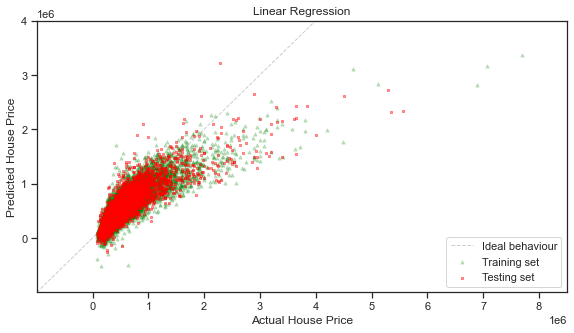

In [21]:
plt.figure(figsize=(9.5,5))
plt.plot([-1e6,4e6],[-1e6,4e6], c='black', alpha=0.2, lw=1, zorder=1, ls='--', label="Ideal behaviour")
plt.scatter(y_train, train_pred, alpha=0.2, c='green', s=10, zorder=2, marker='^', label="Training set")
plt.scatter(y_test, test_pred, alpha=0.4, c='red', s=5, zorder=3, marker='s', label="Testing set")
plt.xlim(-1e6,8.5e6)
plt.ylim(-1e6,4e6)
plt.xticks(np.linspace(0e6,8e6,9))
plt.yticks(np.linspace(0e6,4e6,5))
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.legend(loc='lower right')
plt.title("Linear Regression");

# 2) Random Forest Regression

In [22]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(scaler.transform(X_test))
print("\nTRAINING SET ACCURACY-")
print("1) Mean Absolute Error:", round(mean_absolute_error(y_train, train_pred)))
print("2) Root Mean Squared Error:", round(mean_squared_error(y_train, train_pred)**0.5))
print("3) R-squared Value:", round(r2_score(y_train, train_pred),4))
print("4) Mean Absolute Percentage Error:", str(round((abs(train_pred-y_train.values)/y_train.values*100).mean(),1))+"%")
print("\nTESTING SET ACCURACY-")
print("1) Mean Absolute Error:", round(mean_absolute_error(y_test, test_pred)))
print("2) Root Mean Squared Error:", round(mean_squared_error(y_test, test_pred)**0.5))
print("3) R-squared Value:", round(r2_score(y_test, test_pred),4))
print("4) Mean Absolute Percentage Error:", str(round((abs(test_pred-y_test.values)/y_test.values*100).mean(),1))+"%")


TRAINING SET ACCURACY-
1) Mean Absolute Error: 25917
2) Root Mean Squared Error: 48228
3) R-squared Value: 0.9822
4) Mean Absolute Percentage Error: 4.9%

TESTING SET ACCURACY-
1) Mean Absolute Error: 73313
2) Root Mean Squared Error: 142628
3) R-squared Value: 0.8591
4) Mean Absolute Percentage Error: 13.4%


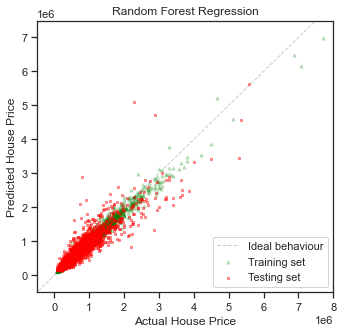

In [24]:
plt.figure(figsize=(5.3125,5))
plt.plot([-1e6,9e6],[-1e6,9e6], c='black', alpha=0.2, lw=1, zorder=1, ls='--', label="Ideal behaviour")
plt.scatter(y_train, train_pred, alpha=0.2, c='green', s=10, zorder=2, marker='^', label="Training set")
plt.scatter(y_test, test_pred, alpha=0.4, c='red', s=5, zorder=3, marker='s', label="Testing set")
plt.xlim(-0.5e6,8e6)
plt.ylim(-0.5e6,7.5e6)
plt.xticks(np.linspace(0e6,8e6,9))
plt.yticks(np.linspace(0e6,7e6,8))
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.legend(loc='lower right')
plt.title("Random Forest Regression");

# 3) Support Vector Regression

In [25]:
scaler_svr = StandardScaler()
y_train_svr = scaler_svr.fit_transform(y_train.values.reshape(-1,1))

In [26]:
svr = SVR()
svr.fit(X_train, y_train_svr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [27]:
train_pred = scaler_svr.inverse_transform(svr.predict(X_train))
test_pred = scaler_svr.inverse_transform(svr.predict(scaler.transform(X_test)))
print("\nTRAINING SET ACCURACY-")
print("1) Mean Absolute Error:", round(mean_absolute_error(y_train, train_pred)))
print("2) Root Mean Squared Error:", round(mean_squared_error(y_train, train_pred)**0.5))
print("3) R-squared Value:", round(r2_score(y_train, train_pred),4))
print("4) Mean Absolute Percentage Error:", str(round((abs(train_pred-y_train.values)/y_train.values*100).mean(),1))+"%")
print("\nTESTING SET ACCURACY-")
print("1) Mean Absolute Error:", round(mean_absolute_error(y_test, test_pred)))
print("2) Root Mean Squared Error:", round(mean_squared_error(y_test, test_pred)**0.5))
print("3) R-squared Value:", round(r2_score(y_test, test_pred),4))
print("4) Mean Absolute Percentage Error:", str(round((abs(test_pred-y_test.values)/y_test.values*100).mean(),1))+"%")


TRAINING SET ACCURACY-
1) Mean Absolute Error: 70162
2) Root Mean Squared Error: 157552
3) R-squared Value: 0.81
4) Mean Absolute Percentage Error: 13.0%

TESTING SET ACCURACY-
1) Mean Absolute Error: 85003
2) Root Mean Squared Error: 183454
3) R-squared Value: 0.7669
4) Mean Absolute Percentage Error: 15.0%


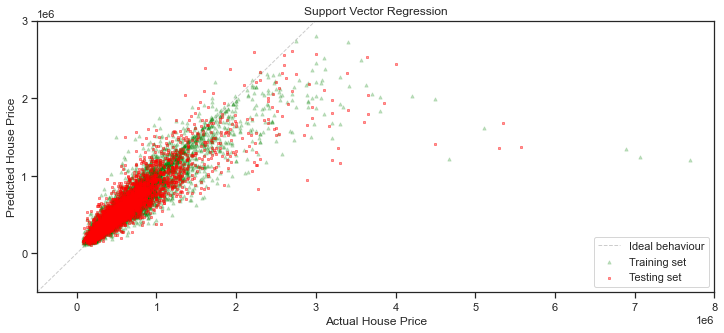

In [28]:
plt.figure(figsize=(12.1429,5))
plt.plot([-1e6,9e6],[-1e6,9e6], c='black', alpha=0.2, lw=1, zorder=1, ls='--', label="Ideal behaviour")
plt.scatter(y_train, train_pred, alpha=0.2, c='green', s=10, zorder=2, marker='^', label="Training set")
plt.scatter(y_test, test_pred, alpha=0.4, c='red', s=5, zorder=3, marker='s', label="Testing set")
plt.xlim(-0.5e6,8e6)
plt.ylim(-0.5e6,3e6)
plt.xticks(np.linspace(0e6,8e6,9))
plt.yticks(np.linspace(0e6,3e6,4))
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.legend(loc='lower right')
plt.title("Support Vector Regression");